In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import dateutil.parser
import datetime
%matplotlib inline

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [2]:
base_df = pd.read_csv("data/all_idea_until2017-06-19.csv")

In [3]:
base_df

,country,eltype,year,vt,vote,reg,vapvt,vap,pop,invot,fhav,fhpr,fhcl,comp
0,Afghanistan,Parliamentary,2005,49.37,6406615.0,12977336.0,51.71,12389532.0,26334702.0,5.10,5.0,5.0,5.0,No
1,Afghanistan,Parliamentary,2010,45.83,4216594.0,9200000.0,29.71,14191908.0,29120727.0,4.42,6.0,6.0,6.0,No
2,Afghanistan,Presidential,2004,83.66,8128940.0,9716413.0,67.54,12035602.0,25697635.0,1.28,5.5,5.0,6.0,No
3,Afghanistan,Presidential,2009,38.80,4823090.0,12430644.0,35.06,13757508.0,28483631.0,4.67,5.5,5.0,6.0,No
4,Afghanistan,Presidential,2014,38.90,8109493.0,20845988.0,50.03,16208255.0,31822848.0,1.68,6.0,6.0,6.0,No
5,Albania,Parliamentary,1991,98.92,1963568.0,1984933.0,98.89,1985550.0,3255000.0,NaN,4.0,4.0,4.0,No
6,Albania,Parliamentary,1992,91.50,1830000.0,2000000.0,89.21,2051430.0,3363000.0,NaN,3.5,4.0,3.0,No
7,Albania,Parliamentary,1996,89.08,1963344.0,2204002.0,89.53,2193030.0,3481000.0,NaN,4.0,4.0,4.0,No
8,Albania,Parliamentary,1997,72.56,1412929.0,1947235.0,63.40,2228430.0,3510500.0,NaN,4.0,4.0,4.0,No
9,Albania,Parliamentary,2001,54.95,1373210.0,2499238.0,67.30,2040574.0,3490435.0,3.60,3.5,3.0,4.0,No


In [4]:
base_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2866 entries, 0 to 2865
Data columns (total 14 columns):
country    2866 non-null object
eltype     2866 non-null object
year       2866 non-null int64
vt         2686 non-null float64
vote       2790 non-null float64
reg        2700 non-null float64
vapvt      2750 non-null float64
vap        2812 non-null float64
pop        2825 non-null float64
invot      2083 non-null float64
fhav       2305 non-null float64
fhpr       2209 non-null float64
fhcl       2210 non-null object
comp       2858 non-null object
dtypes: float64(9), int64(1), object(4)
memory usage: 313.5+ KB


In [5]:
base_df.columns

Index(['country', 'eltype', 'year', 'vt', 'vote', 'reg', 'vapvt', 'vap', 'pop',
       'invot', 'fhav', 'fhpr', 'fhcl', 'comp'],
      dtype='object')

In [6]:
selection = base_df[["country", "eltype", "year", "vt"]]

In [7]:
selection['year'][0].astype(str)+"-01-01"

'2005-01-01'

In [8]:
dateutil.parser.parse(selection['year'][0].astype(str)+"-01-01")

datetime.datetime(2005, 1, 1, 0, 0)

In [9]:
selection['parsed_time'] = [dateutil.parser.parse(value.astype(str)+'-01-01') for value in selection['year']]

/Users/gcg/.virtualenvs/ddj/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [10]:
#create a dataframe that only has all parliamentary elections
selection_parl = selection[selection["eltype"]=="Parliamentary"]

In [11]:
selection_parl.head(10)

,country,eltype,year,vt,parsed_time
0,Afghanistan,Parliamentary,2005,49.37,2005-01-01
1,Afghanistan,Parliamentary,2010,45.83,2010-01-01
5,Albania,Parliamentary,1991,98.92,1991-01-01
6,Albania,Parliamentary,1992,91.50,1992-01-01
7,Albania,Parliamentary,1996,89.08,1996-01-01
8,Albania,Parliamentary,1997,72.56,1997-01-01
9,Albania,Parliamentary,2001,54.95,2001-01-01
10,Albania,Parliamentary,2005,48.73,2005-01-01
11,Albania,Parliamentary,2009,50.77,2009-01-01
12,Albania,Parliamentary,2013,53.31,2013-01-01


In [12]:
selection['eltype'].value_counts()

Parliamentary    2015
Presidential      704
EU Parliament     147
Name: eltype, dtype: int64

In [13]:
# create a df that has the presidential elections only
selection_pres = selection[selection["eltype"]=="Presidential"]
selection_pres

,country,eltype,year,vt,parsed_time
2,Afghanistan,Presidential,2004,83.66,2004-01-01
3,Afghanistan,Presidential,2009,38.80,2009-01-01
4,Afghanistan,Presidential,2014,38.90,2014-01-01
18,Algeria,Presidential,1995,75.69,1995-01-01
19,Algeria,Presidential,1999,60.91,1999-01-01
20,Algeria,Presidential,2004,58.07,2004-01-01
21,Algeria,Presidential,2009,74.56,2009-01-01
22,Algeria,Presidential,2014,49.42,2014-01-01
33,Angola,Presidential,1992,90.37,1992-01-01
84,Argentina,Presidential,1946,83.39,1946-01-01


In [14]:
countries = ['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'Colombia',
 'Comoros',
 'Congo, Democratic Republic of',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 "Côte d'Ivoire",
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'East Timor',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Estonia',
 'Ethiopia',
 'Faroe Islands',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Gibraltar',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran, Islamic Republic of',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Kiribati',
 'Korea, Republic of',
 'Kosovo',
 'Kuwait',
 'Kyrgyzstan',
 "Lao People's Dem, Republic",
 'Latvia',
 'Lebanon',
 'Lesotho',
 'Liberia',
 'Libya',
 'Liechtenstein',
 'Lithuania',
 'Luxembourg',
 'Macedonia, former Yugoslav Republic (1993-)',
 'Madagascar',
 'Malawi',
 'Malaysia',
 'Maldives',
 'Mali',
 'Malta',
 'Marshall Islands',
 'Mauritania',
 'Mauritius',
 'Mexico',
 'Micronesia, Federated States of',
 'Moldova, Republic of',
 'Monaco',
 'Mongolia',
 'Montenegro',
 'Montserrat',
 'Morocco',
 'Mozambique',
 'Myanmar',
 'Namibia',
 'Nauru',
 'Nepal',
 'Netherlands',
 'Netherlands Antilles',
 'New Zealand',
 'Nicaragua',
 'Niger',
 'Nigeria',
 'Norway',
 'Oman',
 'Pakistan',
 'Palau',
 'Palestinian Territory, Occupied',
 'Panama',
 'Papua New Guinea',
 'Paraguay',
 'Peru',
 'Philippines',
 'Poland',
 'Portugal',
 'Republic of The Congo (Brazzaville)',
 'Romania',
 'Russian Federation',
 'Rwanda',
 'Saint Kitts and Nevis',
 'Saint Lucia',
 'Saint Vincent and The Grenadines',
 'Samoa',
 'San Marino',
 'Sao Tome and Principe',
 'Senegal',
 'Serbia',
 'Seychelles',
 'Sierra Leone',
 'Singapore',
 'Slovakia',
 'Slovenia',
 'Solomon Islands',
 'Somalia',
 'South Africa',
 'Spain',
 'Sri Lanka',
 'Sudan',
 'Suriname',
 'Sweden',
 'Switzerland',
 'Syrian Arab Republic',
 'Taiwan',
 'Tajikistan',
 'Tanzania, United Republic of',
 'Thailand',
 'Togo',
 'Tonga',
 'Trinidad and Tobago',
 'Tunisia',
 'Turkey',
 'Turkmenistan',
 'Tuvalu',
 'Uganda',
 'Ukraine',
 'United Kingdom',
 'United States',
 'Uruguay',
 'Uzbekistan',
 'Vanuatu',
 'Venezuela',
 'Viet Nam',
 'Virgin Islands, British',
 'Yemen',
 'Yugoslavia, FR/Union of Serbia and Montenegro',
 'Yugoslavia, SFR (1943-1992)',
 'Zambia',
 'Zimbabwe']

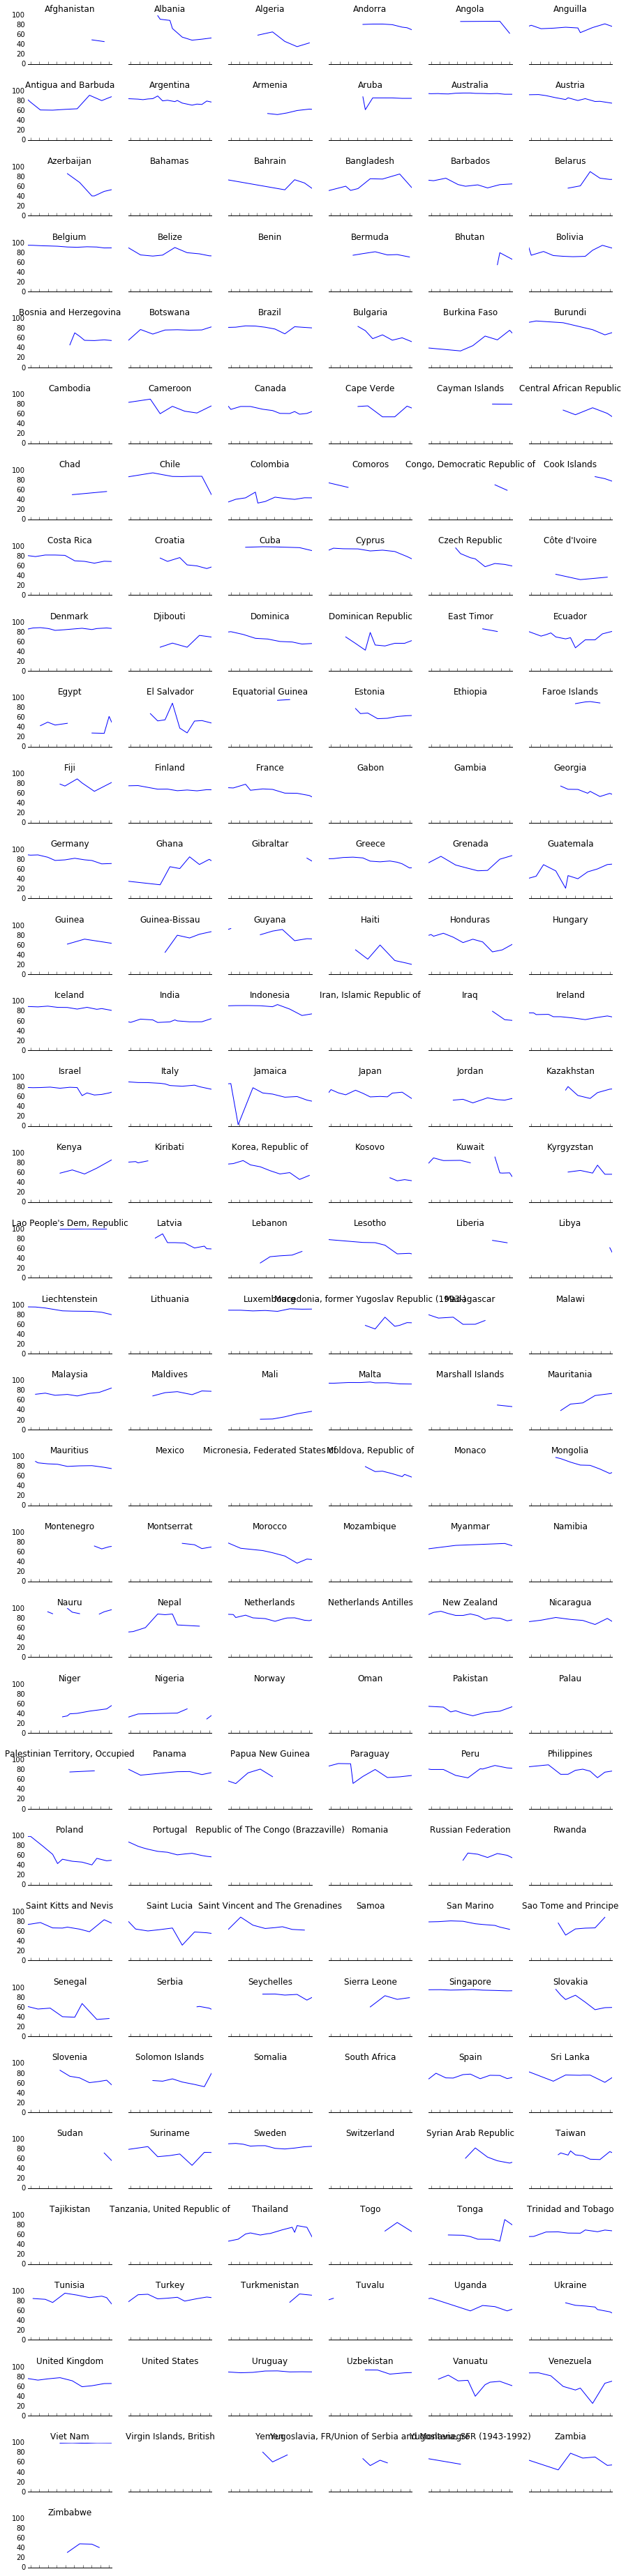

In [15]:
df=selection_parl.copy()
fig, axes = plt.subplots(nrows=49, ncols=6, sharex=True, sharey=True, figsize=(15,105))
axes_list = [item for sublist in axes for item in sublist]

subset_df = df[df['country'].isin(countries)]

for countryname, selection in subset_df.groupby('country'):
    ax = axes_list.pop(0)
    selection.plot(x='parsed_time', y='vt', label=countryname, ax=ax, legend=False)
    ax.set_title(countryname)
    ax.set_ylim(0,100)
    ax.tick_params(
        which='minor',
        bottom='off',
        left='off',
        right='off',
        top='off'
    )
    ax.tick_params(
        which='major',
        bottom='on',
        left='off',
        right='off',
        top='off'
    )
    #ax.grid(linewidth=0.25)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel("")

for ax in axes_list:
    ax.remove()

plt.subplots_adjust(hspace=0.55)

# Europe, parliamentary elections

In [16]:
european_countries = pd.read_csv("europe_country_region_continent.csv")

In [17]:
european_countries_list = european_countries["country"].values.tolist()
# european_countries_list

In [18]:
Europe_countries = set(european_countries_list)

In [19]:
selection_europe = selection_parl[selection_parl["country"].isin(Europe_countries)]

In [20]:
selection_europe15 = selection_europe[(selection_europe["year"]==2015)]

In [21]:
selection_europe15.sort_values(by="vt", ascending = False)

,country,eltype,year,vt,parsed_time
689,Denmark,Parliamentary,2015,85.89,2015-01-01
2359,Spain,Parliamentary,2015,73.20,2015-01-01
1011,Gibraltar,Parliamentary,2015,70.77,2015-01-01
887,Finland,Parliamentary,2015,66.85,2015-01-01
2633,United Kingdom,Parliamentary,2015,66.12,2015-01-01
29,Andorra,Parliamentary,2015,65.62,2015-01-01
847,Estonia,Parliamentary,2015,64.23,2015-01-01
1041,Greece,Parliamentary,2015,63.60,2015-01-01
614,Croatia,Parliamentary,2015,60.82,2015-01-01
2117,Portugal,Parliamentary,2015,55.84,2015-01-01


In [22]:
selection_europe16 = selection_europe[(selection_europe["year"]==2016)]

In [23]:
selection_europe16.sort_values(by="vt", ascending = False)

,country,eltype,year,vt,parsed_time
2818,Belarus,Parliamentary,2016,74.7,2016-01-01
2844,Montenegro,Parliamentary,2016,73.4,2016-01-01
2860,Spain,Parliamentary,2016,69.8,2016-01-01
2824,Cyprus,Parliamentary,2016,66.7,2016-01-01
2832,Ireland,Parliamentary,2016,65.1,2016-01-01
2859,Slovakia,Parliamentary,2016,59.8,2016-01-01
2857,Serbia,Parliamentary,2016,56.1,2016-01-01
2823,Croatia,Parliamentary,2016,52.6,2016-01-01
2840,Lithuania,Parliamentary,2016,50.6,2016-01-01
2854,Russian Federation,Parliamentary,2016,47.9,2016-01-01


In [27]:
selection_France = selection_europe[selection_europe["country"]=="France"]
selection_France

,country,eltype,year,vt,parsed_time
907,France,Parliamentary,1945,79.83,1945-01-01
908,France,Parliamentary,1946,81.85,1946-01-01
909,France,Parliamentary,1951,80.19,1951-01-01
910,France,Parliamentary,1956,82.69,1956-01-01
911,France,Parliamentary,1958,77.18,1958-01-01
912,France,Parliamentary,1962,68.69,1962-01-01
913,France,Parliamentary,1967,81.12,1967-01-01
914,France,Parliamentary,1968,79.85,1968-01-01
915,France,Parliamentary,1973,81.31,1973-01-01
916,France,Parliamentary,1978,71.63,1978-01-01


In [26]:
selection_Germany = selection_europe[selection_europe["country"]=="Germany"]
selection_Germany

,country,eltype,year,vt,parsed_time
977,Germany,Parliamentary,1949,78.49,1949-01-01
978,Germany,Parliamentary,1953,85.99,1953-01-01
979,Germany,Parliamentary,1957,87.77,1957-01-01
980,Germany,Parliamentary,1961,87.74,1961-01-01
981,Germany,Parliamentary,1965,86.77,1965-01-01
982,Germany,Parliamentary,1969,86.67,1969-01-01
983,Germany,Parliamentary,1972,91.11,1972-01-01
984,Germany,Parliamentary,1976,90.75,1976-01-01
985,Germany,Parliamentary,1980,88.57,1980-01-01
986,Germany,Parliamentary,1983,89.09,1983-01-01


# Plotting parliamentary voter turnout in Europe over time

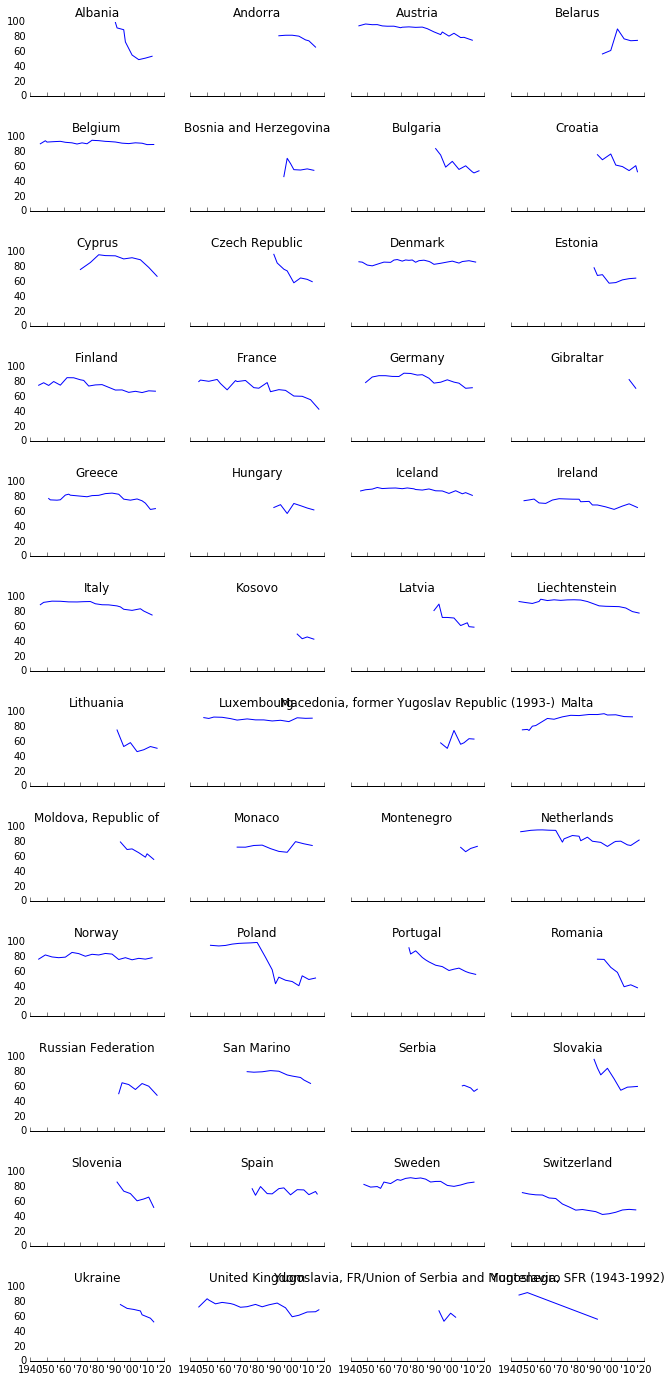

In [28]:
df=selection_parl.copy()
fig, axes = plt.subplots(nrows=12, ncols=4, sharex=True, sharey=True, figsize=(11,24))
axes_list = [item for sublist in axes for item in sublist]

Europe_countries = european_countries_list

subset_df = df[df['country'].isin(Europe_countries)]

for countryname, selection in subset_df.groupby('country'):
    ax = axes_list.pop(0)
    selection.plot(x='year', y='vt', label=countryname, ax=ax, legend=False)
    ax.set_title(countryname)
    ax.set_ylim(0,100)
    ax.set_xlim(1940,2020)
    ax.set_xticklabels(["1940","'50","'60", "'70", "'80", "'90", "'00", "'10", "'20"])
    ax.tick_params(
        which='minor',
        bottom='off',
        left='off',
        right='off',
        top='off'
    )
    ax.tick_params(
        which='major',
        bottom='on',
        left='off',
        right='off',
        top='off'
    )
#     ax.grid(linewidth=0.25)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel("")

for ax in axes_list:
    ax.remove()

plt.subplots_adjust(hspace=0.55)
plt.subplots_adjust(wspace=0.20)


# Europe, presidential election voter turnout

/Users/gcg/.virtualenvs/ddj/lib/python3.5/site-packages/matplotlib/axes/_base.py:2787: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=2013.0, right=2013.0
  'left=%s, right=%s') % (left, right))
/Users/gcg/.virtualenvs/ddj/lib/python3.5/site-packages/matplotlib/axes/_base.py:2787: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=2014.0, right=2014.0
  'left=%s, right=%s') % (left, right))


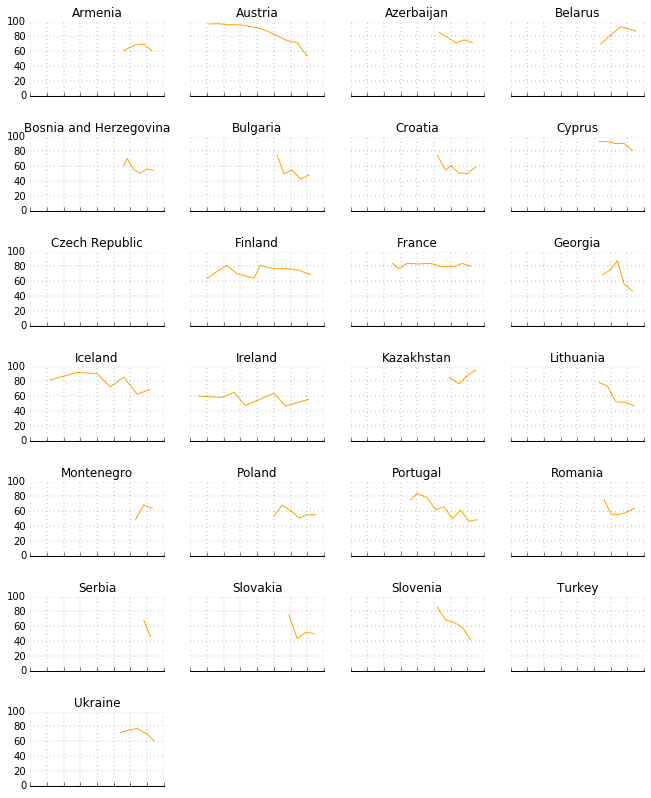

In [29]:
df=selection_pres.copy()
fig, axes = plt.subplots(nrows=12, ncols=4, sharex=True, sharey=True, figsize=(11,24))
axes_list = [item for sublist in axes for item in sublist]

Europe_countries = ['Albania','Andorra','Armenia','Austria','Azerbaijan','Belarus','Belgium','Bosnia and Herzegovina','Bulgaria','Croatia','Cyprus','Czech Republic','Denmark','Estonia','Finland','France','Georgia','Germany','Greece','Hungary','Iceland','Ireland','Italy','Kazakhstan','Kosovo','Latvia','Liechtenstein','Lithuania','Luxembourg','Macedonia (FYROM)','Malta','Moldova','Monaco','Montenegro','Netherlands','Norway','Poland','Portugal','Romania','Russia','San Marino','Serbia','Slovakia','Slovenia','Spain','Sweden','Switzerland','Turkey','Ukraine','United Kingdom (UK)','Vatican City (Holy See)']

subset_df = df[df['country'].isin(Europe_countries)]

for countryname, selection in subset_df.groupby('country'):
    ax = axes_list.pop(0)
    selection.plot(x='year', y='vt', label=countryname, ax=ax, legend=False, c="orange")
    ax.set_title(countryname)
    ax.set_ylim(0,100)
    ax.set_xlim(1940,2020)
    ax.set_xticklabels(["1940","'50","'60", "'70", "'80", "'90", "'00", "'10", "'20"])
    ax.tick_params(
        which='minor',
        bottom='off',
        left='off',
        right='off',
        top='off'
    )
    ax.tick_params(
        which='major',
        bottom='on',
        left='off',
        right='off',
        top='off'
    )
    ax.grid(linewidth=0.25)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel("")

for ax in axes_list:
    ax.remove()

plt.subplots_adjust(hspace=0.55)
plt.subplots_adjust(wspace=0.20)


# Countries with compulsory voting

In [30]:
compulsory_list = []
for country in base_df[base_df["comp"]=="Yes"]["country"]:
    compulsory_list.append(country)

In [31]:
compulsory_voting = set(compulsory_list)

In [32]:
compulsory_voting

{'Argentina',
 'Australia',
 'Austria',
 'Belgium',
 'Bolivia',
 'Brazil',
 'Bulgaria',
 'Chile',
 'Congo, Democratic Republic of',
 'Costa Rica',
 'Cyprus',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'Fiji',
 'Gabon',
 'Greece',
 'Guatemala',
 'Honduras',
 'Italy',
 'Lebanon',
 'Liechtenstein',
 'Luxembourg',
 'Mexico',
 'Nauru',
 'Netherlands',
 'Panama',
 'Paraguay',
 'Peru',
 'Philippines',
 'Singapore',
 'Switzerland',
 'Thailand',
 'Turkey',
 'Uruguay',
 'Venezuela'}

# New df to plot parliamentary and presidential vt in one graph

In [33]:
experiment_df = base_df[["country", "eltype", "year", "vt", "vapvt"]]

In [34]:
experiment_df["key"]=experiment_df["country"]+experiment_df["year"].astype(str)

/Users/gcg/.virtualenvs/ddj/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [35]:
experiment_df_parl = experiment_df[experiment_df["eltype"]=="Parliamentary"]

In [36]:
experiment_df_pres = experiment_df[experiment_df["eltype"]=="Presidential"]

In [37]:
merged_experiment = experiment_df_pres.merge(experiment_df_parl, left_on= "key", right_on = "key")

In [38]:
merged_experiment

,country_x,eltype_x,year_x,vt_x,vapvt_x,key,country_y,eltype_y,year_y,vt_y,vapvt_y
0,Angola,Presidential,1992,90.37,87.51,Angola1992,Angola,Parliamentary,1992,86.91,84.16
1,Argentina,Presidential,1946,83.39,28.34,Argentina1946,Argentina,Parliamentary,1946,83.39,28.34
2,Argentina,Presidential,1951,87.95,67.28,Argentina1951,Argentina,Parliamentary,1951,87.95,67.28
3,Argentina,Presidential,1958,90.86,70.80,Argentina1958,Argentina,Parliamentary,1958,90.86,70.80
4,Argentina,Presidential,1963,85.59,69.82,Argentina1963,Argentina,Parliamentary,1963,85.59,69.82
5,Argentina,Presidential,1973,83.18,72.92,Argentina1973,Argentina,Parliamentary,1973,85.55,74.99
6,Argentina,Presidential,1983,83.25,77.52,Argentina1983,Argentina,Parliamentary,1983,83.25,77.52
7,Argentina,Presidential,1989,85.02,82.82,Argentina1989,Argentina,Parliamentary,1989,84.24,82.07
8,Argentina,Presidential,1995,80.96,79.77,Argentina1995,Argentina,Parliamentary,1995,80.96,79.77
9,Argentina,Presidential,1999,78.61,79.38,Argentina1999,Argentina,Parliamentary,1999,80.54,81.32


# Europe, parliamentary vs presidential electionvoter turnout

/Users/gcg/.virtualenvs/ddj/lib/python3.5/site-packages/matplotlib/axes/_base.py:2787: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=2003.0, right=2003.0
  'left=%s, right=%s') % (left, right))
/Users/gcg/.virtualenvs/ddj/lib/python3.5/site-packages/matplotlib/axes/_base.py:2787: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=2001.0, right=2001.0
  'left=%s, right=%s') % (left, right))
/Users/gcg/.virtualenvs/ddj/lib/python3.5/site-packages/matplotlib/axes/_base.py:2787: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=2013.0, right=2013.0
  'left=%s, right=%s') % (left, right))
/Users/gcg/.virtualenvs/ddj/lib/python3.5/site-packages/matplotlib/axes/_base.py:2787: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expan

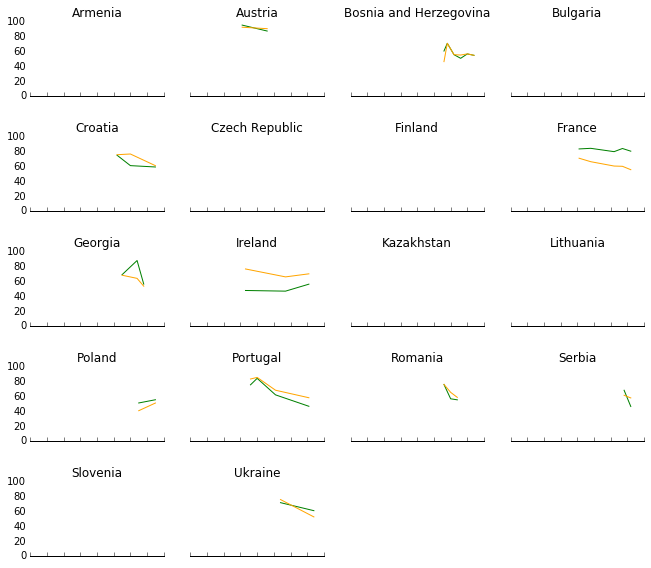

In [39]:
df=merged_experiment.copy()
fig, axes = plt.subplots(nrows=12, ncols=4, sharex=True, sharey=True, figsize=(11,24))
axes_list = [item for sublist in axes for item in sublist]

Europe_countries = ['Albania','Andorra','Armenia','Austria','Azerbaijan','Belarus','Belgium','Bosnia and Herzegovina','Bulgaria','Croatia','Cyprus','Czech Republic','Denmark','Estonia','Finland','France','Georgia','Germany','Greece','Hungary','Iceland','Ireland','Italy','Kazakhstan','Kosovo','Latvia','Liechtenstein','Lithuania','Luxembourg','Macedonia (FYROM)','Malta','Moldova','Monaco','Montenegro','Netherlands','Norway','Poland','Portugal','Romania','Russia','San Marino','Serbia','Slovakia','Slovenia','Spain','Sweden','Switzerland','Turkey','Ukraine','United Kingdom (UK)','Vatican City (Holy See)']

subset_df = df[df['country_x'].isin(Europe_countries)]

for countryname, selection in subset_df.groupby('country_x'):
    ax = axes_list.pop(0)
    selection.plot(x='year_x', y='vt_x', label=countryname, ax=ax, legend=False, c="green")
    selection.plot(x='year_y', y='vt_y', label=countryname, ax=ax, legend=False, c="orange")
    ax.set_title(countryname)
    ax.set_ylim(0,100)
    ax.set_xlim(1940,2020)
    ax.set_xticklabels(["1940","'50","'60", "'70", "'80", "'90", "'00", "'10", "'20"])
    ax.tick_params(
        which='minor',
        bottom='off',
        left='off',
        right='off',
        top='off'
    )
    ax.tick_params(
        which='major',
        bottom='on',
        left='off',
        right='off',
        top='off'
    )
    #ax.grid(linewidth=0.25)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel("")

for ax in axes_list:
    ax.remove()

plt.subplots_adjust(hspace=0.55)
plt.subplots_adjust(wspace=0.20)

# plt.savefig("energy-multiples-prices-domestic.pdf", transparent = True)

# Africa, voter turnout parliamentary

In [40]:
african_countries = pd.read_csv("africa_country_region_continent.csv")

In [41]:
african_countries_list = african_countries["country"].values.tolist()

/Users/gcg/.virtualenvs/ddj/lib/python3.5/site-packages/matplotlib/axes/_base.py:2787: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=2016.0, right=2016.0
  'left=%s, right=%s') % (left, right))


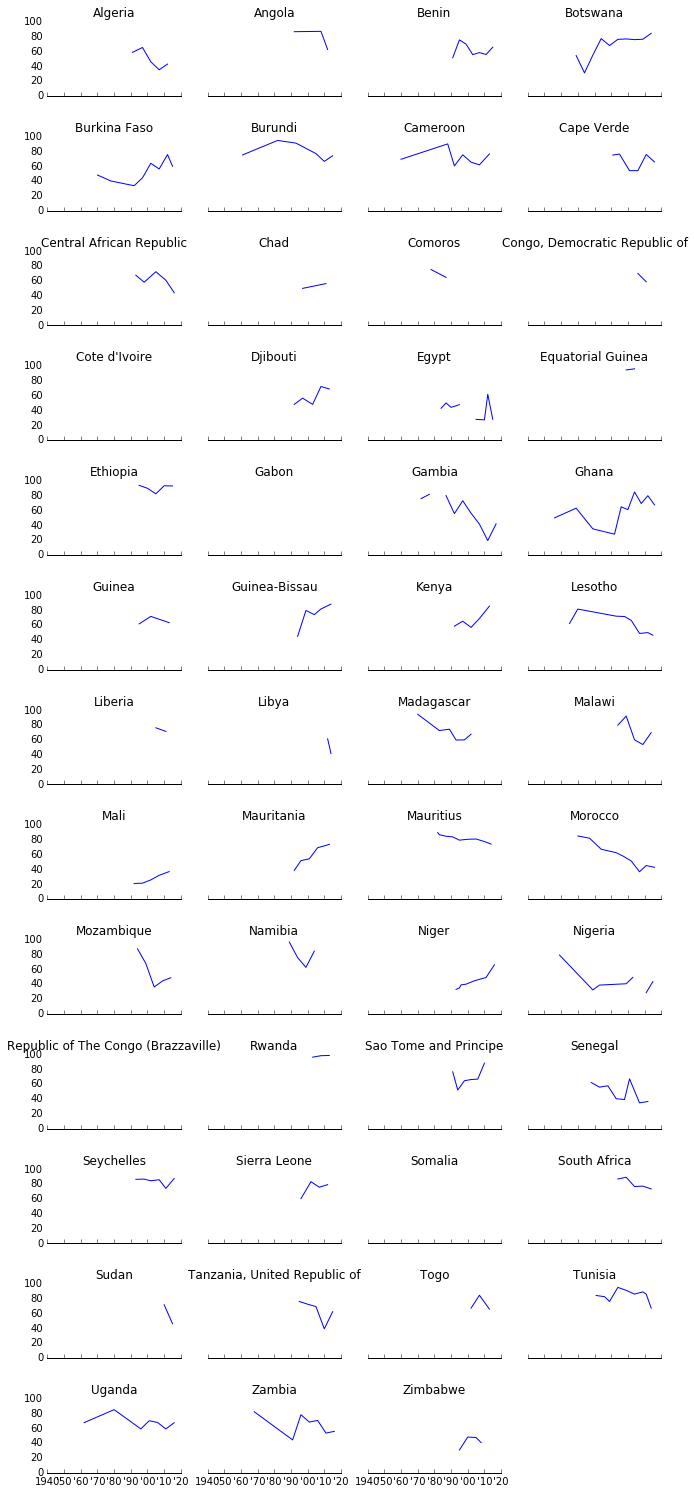

In [42]:
df=selection_parl.copy()
fig, axes = plt.subplots(nrows=13, ncols=4, sharex=True, sharey=True, figsize=(11,26))
axes_list = [item for sublist in axes for item in sublist]

Africa_countries = african_countries_list

subset_df = df[df['country'].isin(Africa_countries)]

for countryname, selection in subset_df.groupby('country'):
    ax = axes_list.pop(0)
    selection.plot(x='year', y='vt', label=countryname, ax=ax, legend=False, c="blue")
    ax.set_title(countryname)
    ax.set_ylim(0,100)
    ax.set_xlim(1940,2020)
    ax.set_xticklabels(["1940","'50","'60", "'70", "'80", "'90", "'00", "'10", "'20"])
    ax.tick_params(
        which='minor',
        bottom='off',
        left='off',
        right='off',
        top='off'
    )
    ax.tick_params(
        which='major',
        bottom='on',
        left='off',
        right='off',
        top='off'
    )
#     ax.grid(linewidth=0.25)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel("")

for ax in axes_list:
    ax.remove()

plt.subplots_adjust(hspace=0.55)
plt.subplots_adjust(wspace=0.20)

# plt.savefig("africa-parliamentary-voter-turnout.pdf", transparent = True)

# African countries, presidential election, voter turnout

/Users/gcg/.virtualenvs/ddj/lib/python3.5/site-packages/matplotlib/axes/_base.py:2787: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1992.0, right=1992.0
  'left=%s, right=%s') % (left, right))
/Users/gcg/.virtualenvs/ddj/lib/python3.5/site-packages/matplotlib/axes/_base.py:2787: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1986.0, right=1986.0
  'left=%s, right=%s') % (left, right))


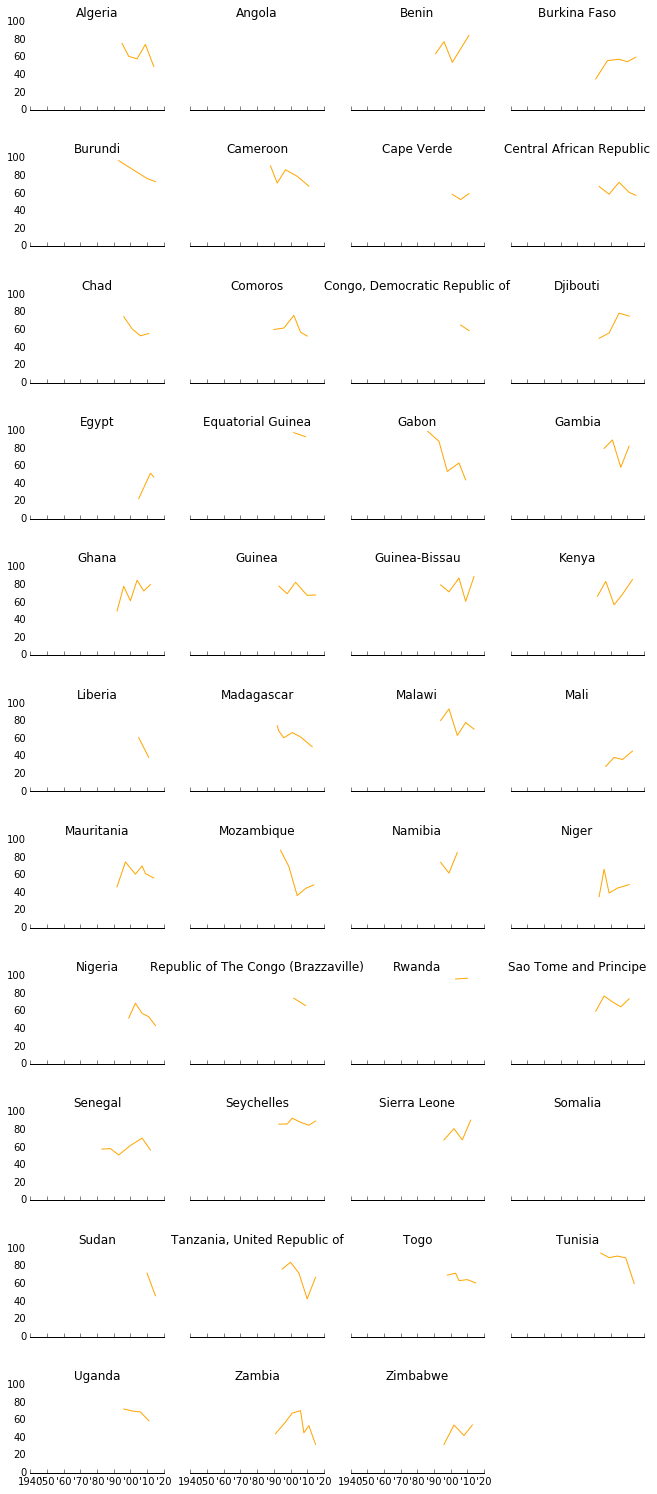

In [43]:
df=selection_pres.copy()
fig, axes = plt.subplots(nrows=11, ncols=4, sharex=True, sharey=True, figsize=(11,26))
axes_list = [item for sublist in axes for item in sublist]

Africa_countries = african_countries_list

subset_df = df[df['country'].isin(Africa_countries)]

for countryname, selection in subset_df.groupby('country'):
    ax = axes_list.pop(0)
    selection.plot(x='year', y='vt', label=countryname, ax=ax, legend=False, c="orange")
    ax.set_title(countryname)
    ax.set_ylim(0,100)
    ax.set_xlim(1940,2020)
    ax.set_xticklabels(["1940","'50","'60", "'70", "'80", "'90", "'00", "'10", "'20"])
    ax.tick_params(
        which='minor',
        bottom='off',
        left='off',
        right='off',
        top='off'
    )
    ax.tick_params(
        which='major',
        bottom='on',
        left='off',
        right='off',
        top='off'
    )
#     ax.grid(linewidth=0.25)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel("")

for ax in axes_list:
    ax.remove()

plt.subplots_adjust(hspace=0.55)
plt.subplots_adjust(wspace=0.20)


# Asia, parliamentary, voter turnout

In [44]:
asian_countries = pd.read_csv("asia_country_region_continent.csv")

In [45]:
asian_countries_list = asian_countries["country"].values.tolist()

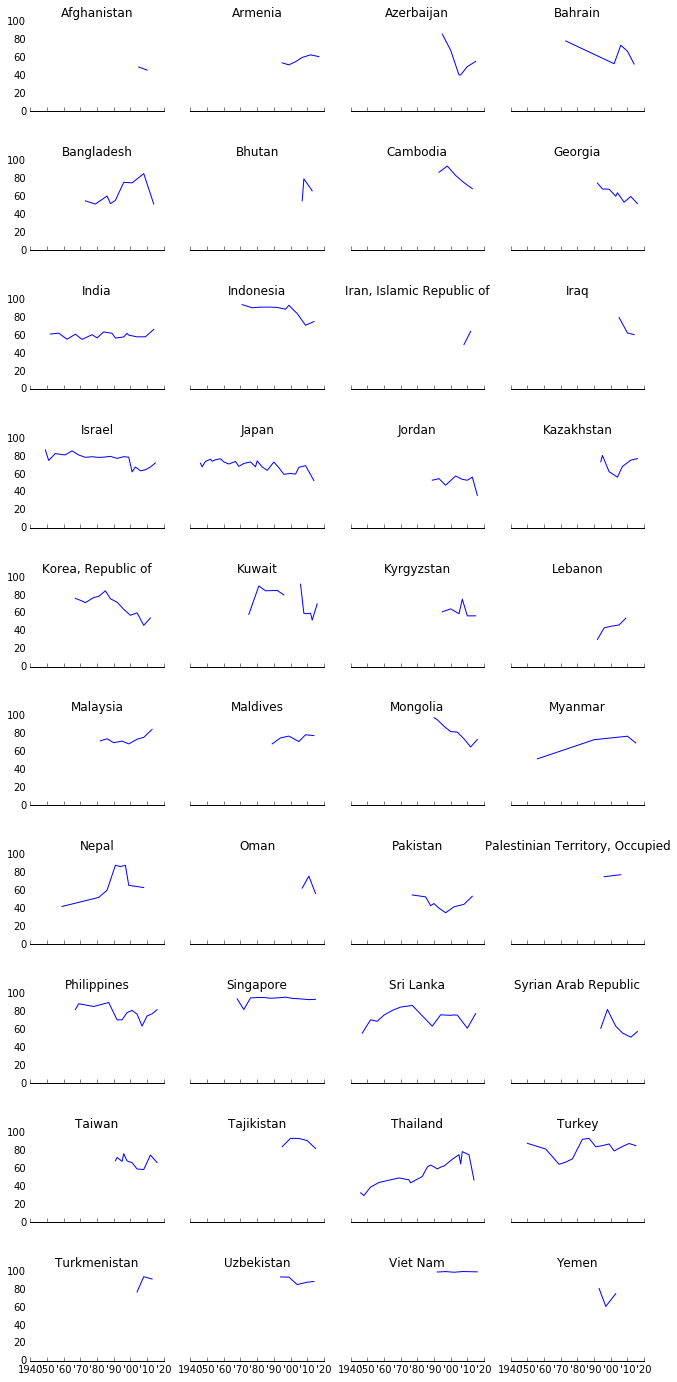

In [46]:
df=selection_parl.copy()
fig, axes = plt.subplots(nrows=10, ncols=4, sharex=True, sharey=True, figsize=(11,24))
axes_list = [item for sublist in axes for item in sublist]

Asia_countries = asian_countries_list

subset_df = df[df['country'].isin(Asia_countries)]

for countryname, selection in subset_df.groupby('country'):
    ax = axes_list.pop(0)
    selection.plot(x='year', y='vt', label=countryname, ax=ax, legend=False, c="blue")
    ax.set_title(countryname)
    ax.set_ylim(0,100)
    ax.set_xlim(1940,2020)
    ax.set_xticklabels(["1940","'50","'60", "'70", "'80", "'90", "'00", "'10", "'20"])
    ax.tick_params(
        which='minor',
        bottom='off',
        left='off',
        right='off',
        top='off'
    )
    ax.tick_params(
        which='major',
        bottom='on',
        left='off',
        right='off',
        top='off'
    )
#     ax.grid(linewidth=0.25)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel("")

for ax in axes_list:
    ax.remove()

plt.subplots_adjust(hspace=0.55)
plt.subplots_adjust(wspace=0.20)

# Asia, presidential

/Users/gcg/.virtualenvs/ddj/lib/python3.5/site-packages/matplotlib/axes/_base.py:2787: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=2014.0, right=2014.0
  'left=%s, right=%s') % (left, right))


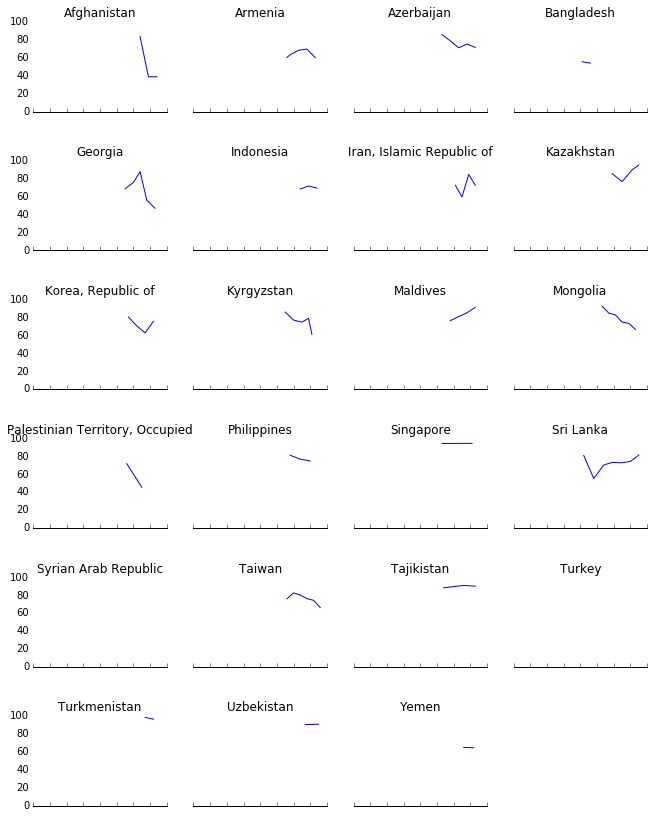

In [47]:
df=selection_pres.copy()
fig, axes = plt.subplots(nrows=10, ncols=4, sharex=True, sharey=True, figsize=(11,24))
axes_list = [item for sublist in axes for item in sublist]

Asia_countries = asian_countries_list

subset_df = df[df['country'].isin(Asia_countries)]

for countryname, selection in subset_df.groupby('country'):
    ax = axes_list.pop(0)
    selection.plot(x='year', y='vt', label=countryname, ax=ax, legend=False, c="blue")
    ax.set_title(countryname)
    ax.set_ylim(0,100)
    ax.set_xlim(1940,2020)
    ax.set_xticklabels(["1940","'50","'60", "'70", "'80", "'90", "'00", "'10", "'20"])
    ax.tick_params(
        which='minor',
        bottom='off',
        left='off',
        right='off',
        top='off'
    )
    ax.tick_params(
        which='major',
        bottom='on',
        left='off',
        right='off',
        top='off'
    )
#     ax.grid(linewidth=0.25)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel("")

for ax in axes_list:
    ax.remove()

plt.subplots_adjust(hspace=0.55)
plt.subplots_adjust(wspace=0.20)

# Americas, parliamentary, vt

In [48]:
american_countries = pd.read_csv("americas_country_region_continent.csv")

In [49]:
american_countries_list = american_countries["country"].values.tolist()

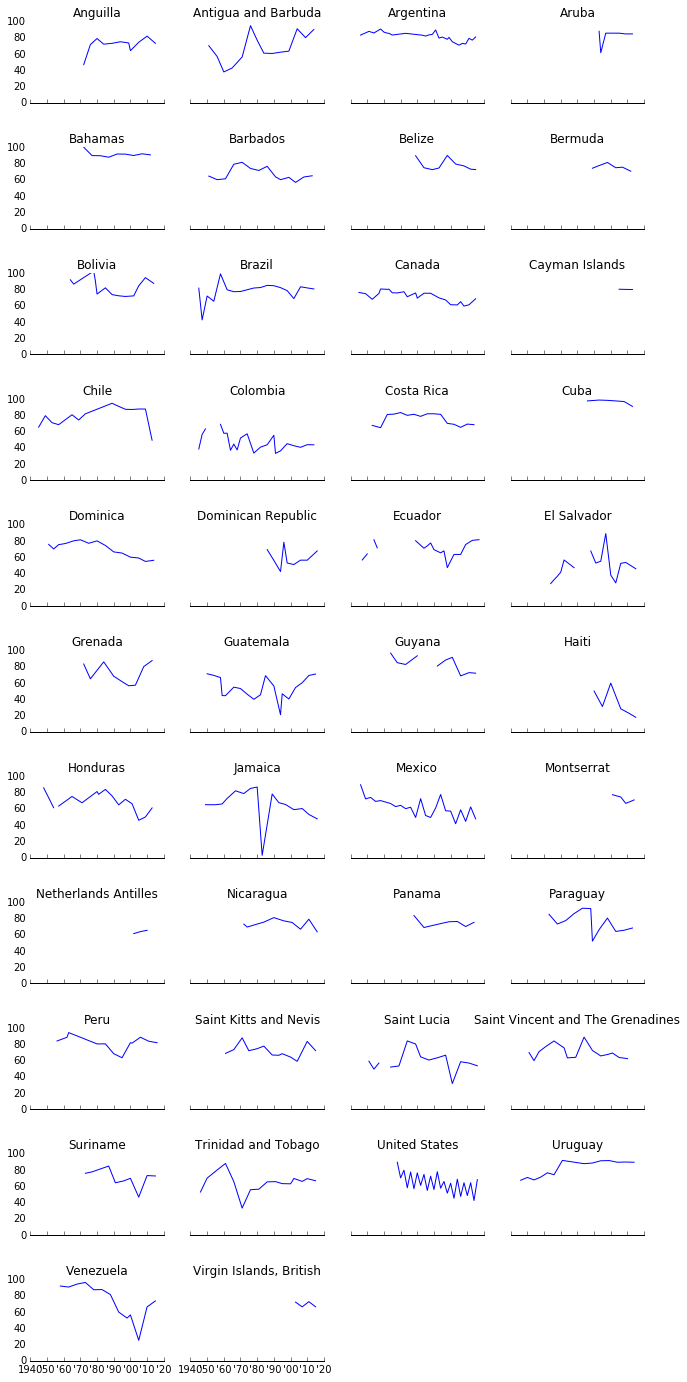

In [50]:
df=selection_parl.copy()
fig, axes = plt.subplots(nrows=11, ncols=4, sharex=True, sharey=True, figsize=(11,24))
axes_list = [item for sublist in axes for item in sublist]

America_countries = american_countries_list

subset_df = df[df['country'].isin(America_countries)]

for countryname, selection in subset_df.groupby('country'):
    ax = axes_list.pop(0)
    selection.plot(x='year', y='vt', label=countryname, ax=ax, legend=False, c="blue")
    ax.set_title(countryname)
    ax.set_ylim(0,100)
    ax.set_xlim(1940,2020)
    ax.set_xticklabels(["1940","'50","'60", "'70", "'80", "'90", "'00", "'10", "'20"])
    ax.tick_params(
        which='minor',
        bottom='off',
        left='off',
        right='off',
        top='off'
    )
    ax.tick_params(
        which='major',
        bottom='on',
        left='off',
        right='off',
        top='off'
    )
#     ax.grid(linewidth=0.25)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel("")

for ax in axes_list:
    ax.remove()

plt.subplots_adjust(hspace=0.55)
plt.subplots_adjust(wspace=0.20)


# America, presidential, voter turnout

/Users/gcg/.virtualenvs/ddj/lib/python3.5/site-packages/matplotlib/axes/_base.py:2787: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1958.0, right=1958.0
  'left=%s, right=%s') % (left, right))


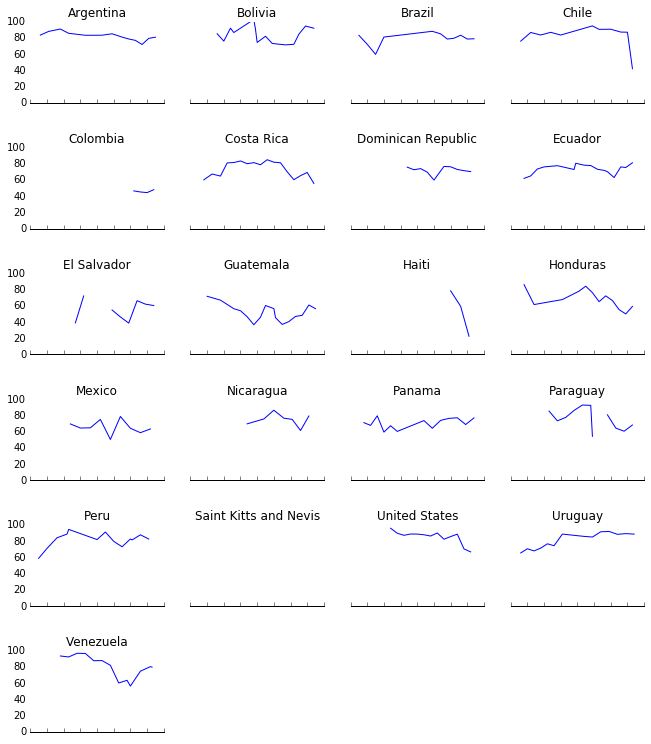

In [51]:
df=selection_pres.copy()
fig, axes = plt.subplots(nrows=11, ncols=4, sharex=True, sharey=True, figsize=(11,24))
axes_list = [item for sublist in axes for item in sublist]

America_countries = american_countries_list

subset_df = df[df['country'].isin(America_countries)]

for countryname, selection in subset_df.groupby('country'):
    ax = axes_list.pop(0)
    selection.plot(x='year', y='vt', label=countryname, ax=ax, legend=False, c="blue")
    ax.set_title(countryname)
    ax.set_ylim(0,100)
    ax.set_xlim(1940,2020)
    ax.set_xticklabels(["1940","'50","'60", "'70", "'80", "'90", "'00", "'10", "'20"])
    ax.tick_params(
        which='minor',
        bottom='off',
        left='off',
        right='off',
        top='off'
    )
    ax.tick_params(
        which='major',
        bottom='on',
        left='off',
        right='off',
        top='off'
    )
#     ax.grid(linewidth=0.25)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel("")

for ax in axes_list:
    ax.remove()

plt.subplots_adjust(hspace=0.55)
plt.subplots_adjust(wspace=0.20)

# Oceania, voter turnout, parliamentary

In [52]:
oceania_countries = pd.read_csv("oceania_country_continent.csv")

In [53]:
oceania_countries_list = oceania_countries["country"].values.tolist()

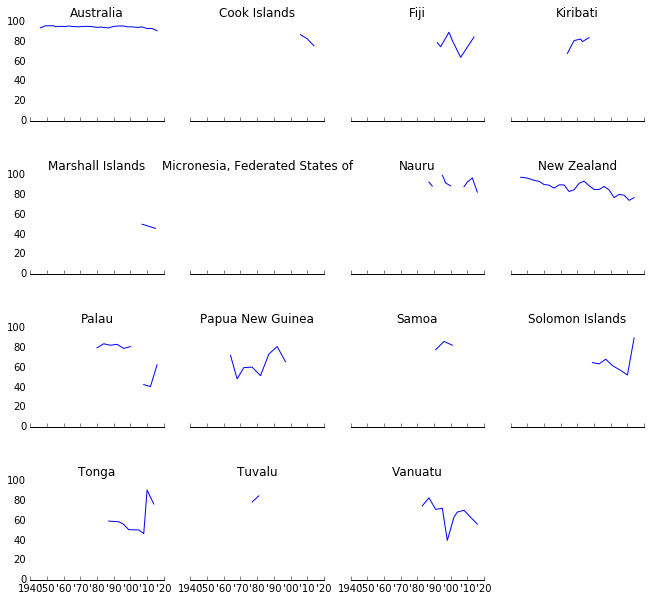

In [54]:
df=selection_parl.copy()
fig, axes = plt.subplots(nrows=4, ncols=4, sharex=True, sharey=True, figsize=(11,10))
axes_list = [item for sublist in axes for item in sublist]

Oceania_countries = oceania_countries_list

subset_df = df[df['country'].isin(Oceania_countries)]

for countryname, selection in subset_df.groupby('country'):
    ax = axes_list.pop(0)
    selection.plot(x='year', y='vt', label=countryname, ax=ax, legend=False, c="blue")
    ax.set_title(countryname)
    ax.set_ylim(0,100)
    ax.set_xlim(1940,2020)
    ax.set_xticklabels(["1940","'50","'60", "'70", "'80", "'90", "'00", "'10", "'20"])
    ax.tick_params(
        which='minor',
        bottom='off',
        left='off',
        right='off',
        top='off'
    )
    ax.tick_params(
        which='major',
        bottom='on',
        left='off',
        right='off',
        top='off'
    )
#     ax.grid(linewidth=0.25)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel("")

for ax in axes_list:
    ax.remove()

plt.subplots_adjust(hspace=0.55)
plt.subplots_adjust(wspace=0.20)

# Oceania, voter turnout, presidential

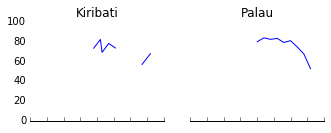

In [55]:
df=selection_pres.copy()
fig, axes = plt.subplots(nrows=4, ncols=4, sharex=True, sharey=True, figsize=(11,10))
axes_list = [item for sublist in axes for item in sublist]

Oceania_countries = oceania_countries_list

subset_df = df[df['country'].isin(Oceania_countries)]

for countryname, selection in subset_df.groupby('country'):
    ax = axes_list.pop(0)
    selection.plot(x='year', y='vt', label=countryname, ax=ax, legend=False, c="blue")
    ax.set_title(countryname)
    ax.set_ylim(0,100)
    ax.set_xlim(1940,2020)
    ax.set_xticklabels(["1940","'50","'60", "'70", "'80", "'90", "'00", "'10", "'20"])
    ax.tick_params(
        which='minor',
        bottom='off',
        left='off',
        right='off',
        top='off'
    )
    ax.tick_params(
        which='major',
        bottom='on',
        left='off',
        right='off',
        top='off'
    )
#     ax.grid(linewidth=0.25)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel("")

for ax in axes_list:
    ax.remove()

plt.subplots_adjust(hspace=0.55)
plt.subplots_adjust(wspace=0.20)